# LOGISTIC REGRESSION with Gradient Descent

In [60]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.random import rand

### Generating Training Set

In [61]:
#Number of instances N in each set
N = 500
#For set 1
mu1 = np.array([1,0])
cov1 = np.array([[1,0.75],[0.75,1]])
#For set 2
mu2 = np.array([0,1])
cov2 = np.array([[1,-0.5],[0.5,1]])
#Inputs x1, x2
np.random.seed(1) 
x1 = np.array(np.random.multivariate_normal(mu1, cov1, N))
x2 = np.array(np.random.multivariate_normal(mu2, cov2, N))

label0_train = np.zeros(500).reshape(500,1)
label1_train = np.ones(500).reshape(500,1)
labels_train = np.concatenate((label0_train,label1_train), axis = 0)
X_train = np.concatenate((x1,x2), axis = 0)

X_train = np.concatenate((X_train,labels_train), axis = 1)
np.random.shuffle(X_train)
X_pd = pd.DataFrame(X_train,columns=['Feature1','Feature2','label'])

X_train = X_pd.drop(columns=['label'])
X_train = np.array(X_train)
y_class_pd = X_pd[['label']]
y_class = np.array(y_class_pd)

X_pd

C:\Users\ankit\AppData\Local\Temp/ipykernel_18460/327875085.py:12: RuntimeWarning: covariance is not positive-semidefinite.
  x2 = np.array(np.random.multivariate_normal(mu2, cov2, N))


,Feature1,Feature2,label
0,0.823529,0.692532,0.0
1,0.570844,0.121096,0.0
2,-0.543924,0.981759,1.0
3,1.534962,0.417238,0.0
4,1.016518,-0.508885,1.0
...,...,...,...
995,1.955970,1.345258,0.0
996,0.441844,0.051665,1.0
997,1.828601,1.178731,0.0
998,0.419913,0.045802,0.0


### Class LogisticRegression

In [62]:
class LogisticReg:
    def __init__(self, LearningRate = 0.001, iterations = 10000):
        self.eta_lr = LearningRate
        self.total_iterations = iterations
        
    def fit(self, X, y_class): #only for training data
        # Gradient Descent
        N_instances, N_features = X.shape
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))
        
        self.weights = np.zeros(X.shape[1]).reshape(X.shape[1], 1) # 3 weights now not 2
        
        #print("self.weights", (self.weights).shape)
        #print("N_instances = ",N_instances,"N_features",N_features)
        
        for no_of_iterations_to_converge in range(self.total_iterations):
            #while update_in_weight very very small
            
            net = np.dot(X,self.weights) 
            o_class = self.sigmoid(net)
            
            
            gradient_errorWRTweights = np.array( (1/N_instances)*np.dot(X.T,(o_class - y_class)) )
            self.weights = self.weights - self.eta_lr*gradient_errorWRTweights
           
            
            if ((gradient_errorWRTweights[0]<0.0001) and (gradient_errorWRTweights[1]<0.0001) and (gradient_errorWRTweights[2]<0.0001)):
                print("It took",no_of_iterations_to_converge,"iterations/epochs to converge when learning rate = ",self.eta_lr)
                break
        
        print("gradient_errorWRTweights.shape =",gradient_errorWRTweights.shape)
        
        return int(no_of_iterations_to_converge)
        #print(o_class.shape)
            
    def prediction(self, X): #for testing data both we want to predict
        N_instances, N_features = X.shape
        intercept = np.ones((X.shape[0], 1))
        X = np.hstack((intercept, X))        
        
        net = np.array(np.dot(X,self.weights)) 
        y_sigmoid = self.sigmoid(net) #sigmoid
        np.array(y_sigmoid)
        
        o_class = [1 if i > 0.5 else 0 for i in y_sigmoid]        
        o_class = (np.array(o_class)).reshape(X.shape[0],1)
        
        return o_class, y_sigmoid
                    
    def sigmoid(self,net):
        return 1/(1+np.exp(-net))

In [63]:
#TPR, TNR
#LET POSITIVE BE INDICATED BY 1 and NEGATIVE BE INDICATED BY 0

#TPR, TNR, FPR, FNR, Accuracy for TESTING SET
def TPR_TNR_FPR_FNR_Accuracy_Precision_Recall(y_class_true,y_class_pred):
    count_TP,count_TN,count_FP,count_FN,Accuracy = 0,0,0,0,0
    #print(y_class_pred.shape)
    #print(y_class_true.shape)
    y_class_true_shape = np.array(y_class_true).shape #.reshape(len(y_class_true),1)
    #print(y_class_true_shape)
    y_class_pred_shape = np.array(y_class_pred).shape #.reshape(len(y_class_pred),1)
    #print(y_class_pred_shape)
    for i in range(len(y_class_true)):
        if((y_class_true[i] == 1) and (y_class_pred[i] == 1)):
            count_TP = count_TP + 1
        if((y_class_true[i] == 0) and (y_class_pred[i] == 0)):
            count_TN = count_TN + 1
        if((y_class_true[i] == 0) and (y_class_pred[i] == 1)):
            count_FP = count_FP + 1
        if((y_class_true[i] == 1) and (y_class_pred[i] == 0)):
            count_FN = count_FN + 1
            
    print("count_TP = ",count_TP,"\ncount_TN = ",count_TN,"\ncount_FP = ",count_FP,"\ncount_FN = ",count_FN)
    
    TPR = (count_TP/(count_TP + count_FN)) * 100
    TNR = (count_TN)/(count_TN + count_FP) * 100
    FPR = (count_FP)/(count_FP + count_TN) * 100
    FNR = (count_FN)/(count_FN + count_TP) * 100
    Accuracy = ((count_TP + count_TN)/(count_TP+count_FP+count_FN+count_TN))*100
    Precision =((count_TP)/(count_TP + count_FP)) *100
    Recall = ((count_TP)/(count_TP + count_FN)) *100
    
    return TPR, TNR, FPR, FNR, Accuracy,Precision,Recall


In [64]:
X_LogisticReg =  LogisticReg() #Default Learning Rate

X_LogisticReg.fit(X_train, y_class)

PRED_CLASS_TRAIN, PRED_SIGMOID_TRAIN = X_LogisticReg.prediction(X_train)
print("For Train set:\n")
TPR,TNR,FPR,FNR,Accuracy,Precision,Recall= TPR_TNR_FPR_FNR_Accuracy_Precision_Recall(y_class,PRED_CLASS_TRAIN)
print("TPR =",TPR,"\nTNR",TNR,"\nFPR =",FPR,"\nFNR =",FNR,"\nAccuracy =",Accuracy,"\nPrecision =",Precision,"\nRecall =",Recall)

gradient_errorWRTweights.shape = (3, 1)
For Train set:

count_TP =  378 
count_TN =  455 
count_FP =  45 
count_FN =  122
TPR = 75.6 
TNR 91.0 
FPR = 9.0 
FNR = 24.4 
Accuracy = 83.3 
Precision = 89.36170212765957 
Recall = 75.6


In [65]:
X_LogisticReg.weights

array([[ 0.02699749],
       [-0.97858279],
       [ 1.02646961]])

### Test Data

In [66]:
xx = X_train[:800]
xx.shape
yy = y_class[:800]
yy.shape

xx_test = X_train[-200:]
xx_test.shape
yy_test = y_class[-200:]
yy_test.shape

xx_LogisticReg_test =  LogisticReg() #Default Learning Rate

xx_LogisticReg_test.fit(xx, yy)
print("xx_LogisticReg_test.weights = ",xx_LogisticReg_test.weights)
PRED_CLASS_TEST_1, PRED_SIGMOID_TEST_1 = xx_LogisticReg_test.prediction(xx_test)
#PRED_CLASS_TEST

print("For Test set:\n")
TPR,TNR,FPR,FNR,Accuracy,Precision,Recall= TPR_TNR_FPR_FNR_Accuracy_Precision_Recall(yy_test, PRED_CLASS_TEST_1)
print("TPR =",TPR,"\nTNR",TNR,"\nFPR =",FPR,"\nFNR =",FNR,"\nAccuracy =",Accuracy,"\nPrecision =",Precision,"\nRecall =",Recall)

gradient_errorWRTweights.shape = (3, 1)
xx_LogisticReg_test.weights =  [[ 0.05977079]
 [-0.97245566]
 [ 0.99795247]]
For Test set:

count_TP =  80 
count_TN =  91 
count_FP =  12 
count_FN =  17
TPR = 82.4742268041237 
TNR 88.3495145631068 
FPR = 11.650485436893204 
FNR = 17.525773195876287 
Accuracy = 85.5 
Precision = 86.95652173913044 
Recall = 82.4742268041237


### ROC curve

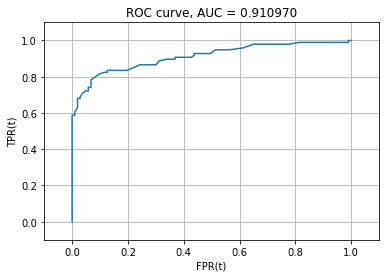

In [67]:
thresholds = np.linspace(1,0,101)
T = PRED_SIGMOID_TEST_1

Y = yy_test

ROC = np.zeros((101,2))

for i in range(101):
    t = thresholds[i]

    # Classifier / label agree and disagreements for current threshold.
    TP_t = np.logical_and( T > t, Y==1 ).sum()
    TN_t = np.logical_and( T <=t, Y==0 ).sum()
    FP_t = np.logical_and( T > t, Y==0 ).sum()
    FN_t = np.logical_and( T <=t, Y==1 ).sum()

        
    # Compute false positive rate for current threshold.
    FPR_t = FP_t / float(FP_t + TN_t)
    ROC[i,0] = FPR_t

    # Compute true  positive rate for current threshold.
    TPR_t = TP_t / float(TP_t + FN_t)
    ROC[i,1] = TPR_t

# Plot the ROC curve.
#fig = plt.figure(figsize=(10,8))
plt.plot(ROC[:,0], ROC[:,1])
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel('FPR(t)')
plt.ylabel('TPR(t)')
plt.grid()

AUC = 0.
for i in range(100):
    AUC += (ROC[i+1,0]-ROC[i,0]) * (ROC[i+1,1]+ROC[i,1])
AUC *= 0.5

plt.title('ROC curve, AUC = %.6f'%AUC)
plt.show()

### Learning Rates = 0.0001,0.001, 0.01, 0.1, and 1

#### LR = 0.0001

In [68]:
#X_train = X
X_train_LogisticReg =  LogisticReg(LearningRate = 0.0001)

no_of_iterations_to_converge_1 = X_train_LogisticReg.fit(xx, yy)
no_of_iterations_to_converge_1

gradient_errorWRTweights.shape = (3, 1)


9999

#### LR = 0.001

In [69]:
#X_train = X
X_train_LogisticReg =  LogisticReg(LearningRate = 0.001)

no_of_iterations_to_converge_2 = X_train_LogisticReg.fit(xx,yy)
no_of_iterations_to_converge_2

gradient_errorWRTweights.shape = (3, 1)


9999

#### LR = 0.01

In [70]:
#X_train = X
X_train_LogisticReg =  LogisticReg(LearningRate = 0.01)

no_of_iterations_to_converge_3 = X_train_LogisticReg.fit(xx,yy)

gradient_errorWRTweights.shape = (3, 1)


#### LR = 0.1

In [71]:
#X_train = X
X_train_LogisticReg =  LogisticReg(LearningRate = 0.1)

no_of_iterations_to_converge_4 = X_train_LogisticReg.fit(xx,yy)

It took 1334 iterations/epochs to converge when learning rate =  0.1
gradient_errorWRTweights.shape = (3, 1)


#### LR = 1

In [72]:
#X_train = X
X_train_LogisticReg =  LogisticReg(LearningRate = 1)

no_of_iterations_to_converge_5 = X_train_LogisticReg.fit(xx,yy)

It took 130 iterations/epochs to converge when learning rate =  1
gradient_errorWRTweights.shape = (3, 1)


### Plot LR v/s Epochs_to_converge

<AxesSubplot:xlabel='Learning_Rate', ylabel='Epochs_to_converge(max 10000)'>

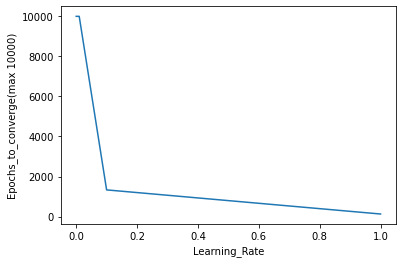

In [73]:

no_of_iterations_to_converge_pd = [no_of_iterations_to_converge_1,no_of_iterations_to_converge_2,no_of_iterations_to_converge_3,no_of_iterations_to_converge_4,no_of_iterations_to_converge_5]
no_of_iterations_to_converge_pd = np.array(no_of_iterations_to_converge_pd)
no_of_iterations_to_converge_pd

learning_rates_pd = [0.0001,0.001,0.01,0.1,1]
learning_rates_pd = np.array(learning_rates_pd)
learning_rates_pd

pd_1=pd.DataFrame(no_of_iterations_to_converge_pd,columns=['Epochs_to_converge(max 10000)'])
pd_2=pd.DataFrame(learning_rates_pd,columns=['Learning_Rate'])
df_lr_vs_iterations = pd.concat((pd_1,pd_2),axis=1)
sns.lineplot(x='Learning_Rate',y='Epochs_to_converge(max 10000)',data=df_lr_vs_iterations)

In [74]:
best_lr_epochs = df_lr_vs_iterations.nsmallest(1, 'Epochs_to_converge(max 10000)') #['Epochs_to_converge(max 10000)']
print('Learning rate for the least epochs is:', best_lr_epochs['Learning_Rate'].iloc[0], 'and the number of epochs is', best_lr_epochs['Epochs_to_converge(max 10000)'].iloc[0])

Learning rate for the least epochs is: 1.0 and the number of epochs is 130
